<div style = "background-color:yellow">
<h2><b>Competição DSA de Machine Learning</b></h2>
<h3><i>Edição de Fevereiro/2019</i></h3>

<p><strong>Construir um modelo preditivo capaz de prever o Energy Star Score</strong></p>

<p>Maires informações em: https://www.kaggle.com/c/competicao-dsa-machine-learning-fev-2019</p>
</div>

<b>1. Importar bibliotecas</b>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import Imputer, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.svm          import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble     import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors    import KNeighborsRegressor

warnings.filterwarnings('ignore')
%matplotlib inline

<b>2. Importar arquivo</b>

In [10]:
arquivo = pd.read_csv('dataset_treino.csv')

<b>3. Verificar a estrutura do data frame</b>

In [11]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 60 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   662

<b>4. Prévias do arquivo</b>

In [12]:
pd.set_option('display.max_columns', 60)
arquivo.head(10)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,72,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
1,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,Not Available,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Building,Not Available,67,75.7,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
2,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,Not Available,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,Not Available,Not Available,Not Available,Not Available,1911,2,100,Whole Building,Whole Building,100,68.0,Not Available,6.1,0.5,Not Available,Not Available,112138.8,Not Available,Not Available,Not Available,Not Available,8786386.9,98264.5,4013954.9,1156269.9,847.5,475,372.5,189766,Not Available,Not Available,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
3,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,Not Available,10021,830,PARK AVENUE,Manhattan,151666.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.0,Not Available,Not Available,Not Available,Not Available,1911,1,100,Another configuration,Not Available,100,23.7,23.4,6.8,Not Available,73.3,Not Available,Not Available,Not Availa

<b>5. Tratamento dos dados</b>

<b>5.1. Converter os dados para float</b>

In [13]:
arquivo = arquivo.replace({'Not Available': np.nan})

for col in list(arquivo.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 
       'therms' in col or 'gal' in col or 'Score' in col):
        arquivo[col] = arquivo[col].astype(float)

In [14]:
arquivo.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,6622.000000,6.622000e+03,6.590000e+03,6.622000e+03,1612.000000,514.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,5896.000000,6296.000000,5649.000000,5896.000000,5.000000e+00,1.481000e+03,7.530000e+02,2.860000e+02,6.000000,5.030000e+02,5.928000e+03,5.649000e+03,6.570000e+03,6.296000e+03,6621.000000,6614.000000,6614.000000,6.622000e+03,4.502000e+03,4502.000000,6622.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000
mean,7420.259740,3.649956e+06,1.611635e+05,1.547783e+05,22662.932444,12502.628794,1948.317729,1.285563,99.017668,60.477348,80.122350,84.091944,6.973713,0.477111,138.363959,3.336538e+06,3.074458e+06,5.318120e+06,2.795825e+06,153097.883333,1.685673e+07,6.237902e+06,6.626896e+04,4.750402e+06,1.399142e+06,932.017158,405.781569,527.139734,1.598433e+05,1.367500e+04,108.922719,133.982936,40.754060,-73.955909,7.343203,16.422533,5043.087896
std,4220.064155,1.044968e+06,2.569749e+05,2.340884e+05,50524.671131,17737.195110,29.885053,3.892317,5.666364,29.440291,32.013067,33.271017,5.257358,0.351980,60.102563,2.786021e+06,5.175480e+06,5.877113e+06,4.060781e+06,173546.932889,2.294705e+07,1.877859e+07,1.915811e+05,1.127362e+07,3.340838e+06,1850.961607,1038.225238,1481.329471,2.439364e+05,9.546646e+04,681.005299,59.484419,0.082595,0.044884,3.952419,15.864064,13028.985484
min,21.000000,7.365000e+03,5.002800e+04,3.800000e+03,0.000000,0.000000,1649.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.337000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.200000e+02,0.000000e+00,0.000000,0.000000,40.521360,-74.224464,1.000000,1.000000,1.000000
25%,3695.250000,2.769788e+06,6.519200e+04,6.600000e+04,5405.750000,3000.000000,1927.000000,1.000000,100.000000,38.000000,62.700000,66.300000,3.800000,0.100000,104.100000,5.559999e+05,2.691138e+05,2.373376e+06,0.000000e+00,5230.200000,4.387249e+06,1.166984e+06,1.249730e+04,1.019377e+06,2.951576e+05,334.700000,170.100000,94.000000,6.700000e+04,2.779950e+03,29.062500,100.000000,40.701918,-73.983939,5.000000,4.000000,105.000000
50%,7374.500000,3.324127e+06,9.161600e+04,9.100000e+04,9898.500000,7926.500000,1940.000000,1.000000,100.000000,66.000000,78.500000,82.600000,5.100000,0.500000,128.300000,4.328815e+06,1.333494e+06,4.365401e+06,2.092395e+05,113962.450000,9.380733e+06,4.191220e+06,4.534650e+04,1.761624e+06,5.144488e+05,498.900000,279.600000,164.300000,9.299800e+04,4.851550e+03,46.750000,123.650000,40.759206,-73.962474,7.000000,10.000000,218.000000
75%,11165.000000,4.409690e+06,1.551560e+05,1.514815e+05,20000.000000,14575.000000,1964.000000,1.000000,100.000000,86.000000,95.900000,101.200000,8.500000,0.700000,162.425000,5.313426e+06,4.445808e+06,6.462982e+06,4.992165e+06,259247.825000,1.886548e+07,6.764235e+06,7.260140e+04,4.027940e+06,1.174309e+06,

In [15]:
# Tratar valores missing
def tratar_valores_missing(df):
    mis_val               = df.isnull().sum()
    mis_val_percent       = mis_val / len(df) * 100
    mis_val_table         = pd.concat([mis_val, mis_val_percent], axis = 1)
    mis_val_table_ren_col = mis_val_table.rename(columns = {0: 'Missing Values',
                                                            1: '% of Total Values'})
    mis_val_table_ren_col = mis_val_table_ren_col[mis_val_table_ren_col.iloc[:, 1] != 0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your dataframe has ' + str(df.shape[1]) + ' columns.\n'
         'There are ' + str(mis_val_table_ren_col.shape[0]), 'cols with nan values')
    return mis_val_table_ren_col

In [16]:
tratar_valores_missing(arquivo)

Your dataframe has 60 columns.
There are 39 cols with nan values


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),6617,99.9
Diesel #2 Use (kBtu),6616,99.9
Address 2,6515,98.4
Fuel Oil #5 & 6 Use (kBtu),6336,95.7
District Steam Use (kBtu),6119,92.4
3rd Largest Property Use Type,6108,92.2
3rd Largest Property Use Type - Gross Floor Area (ft²),6108,92.2
Fuel Oil #4 Use (kBtu),5869,88.6
Fuel Oil #2 Use (kBtu),5141,77.6
2nd Largest Property Use - Gross Floor Area (ft²),5010,75.7


In [17]:
# colunas com mais de 50% de valores nan:
missing_df   = tratar_valores_missing(arquivo)
missing_cols = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('Total cols will be drop: ', len(missing_cols))

Your dataframe has 60 columns.
There are 39 cols with nan values
Total cols will be drop:  11


In [18]:
arquivo = arquivo.drop(columns = list(missing_cols))

In [19]:
# resultado
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 49 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6532 non-null object
Address 1 (self-reported)                                     6622 non-null object
Postal Code                                                   6622 non-null object
Street Number                                                 658

<b>6. AED</b>

Text(0.5, 1.0, 'Energy Star Score Distribution')

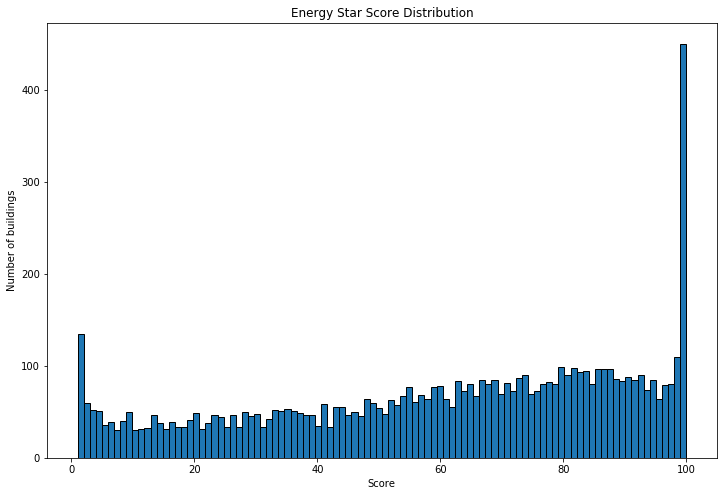

In [20]:
# Visualizar primeiros registros
arquivo = arquivo.rename(columns = {'ENERGY STAR Score': 'score'})

plt.figure(figsize=(12,8))
plt.hist(arquivo['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of buildings');
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

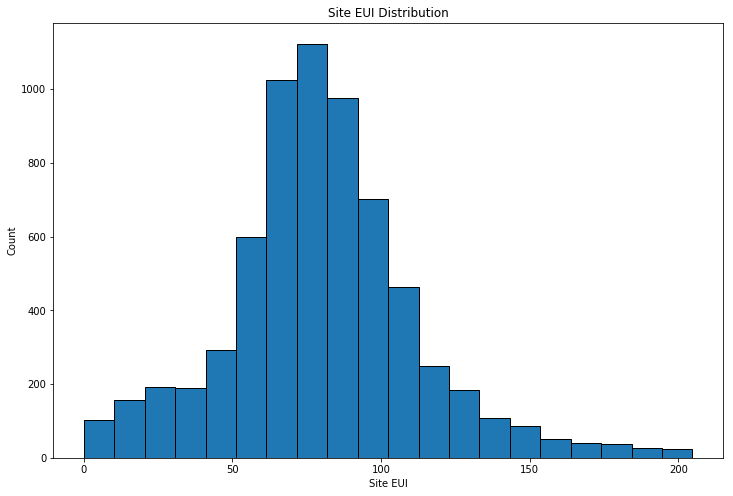

In [21]:
plt.figure(figsize=(12,8))
plt.hist(arquivo['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [22]:
arquivo['Site EUI (kBtu/ft²)'].describe()

count    6622.000000
mean       80.122350
std        32.013067
min         0.000000
25%        62.700000
50%        78.500000
75%        95.900000
max       204.800000
Name: Site EUI (kBtu/ft²), dtype: float64

In [23]:
arquivo['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

5903    200.2
2717    200.6
5942    200.7
6251    201.3
6607    202.1
492     203.5
728     203.7
2786    204.1
1736    204.7
6275    204.8
Name: Site EUI (kBtu/ft²), dtype: float64

In [26]:
# Verificar relacionamentos entre as variáveis
types = arquivo.dropna(subset = ['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star by Buiding Type')

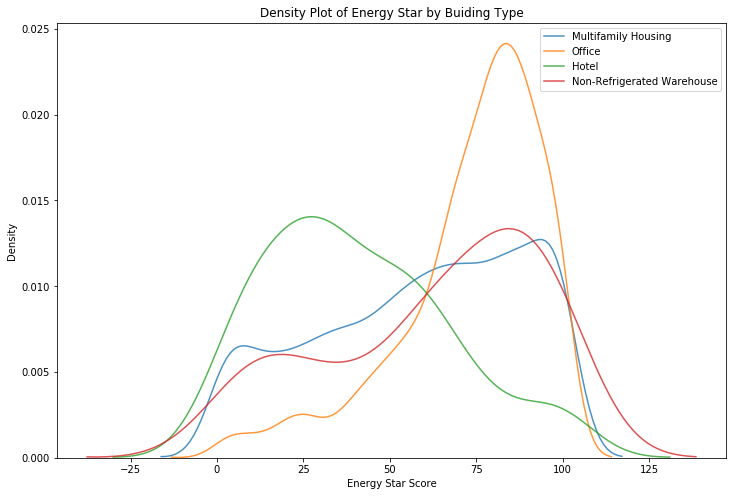

In [33]:
plt.figure(figsize=(12,8))

for b_type in types:
    subset = arquivo[arquivo['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade = False, alpha = 0.8)
    
plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star by Buiding Type')

In [43]:
boroughs = arquivo.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star by boroughs')

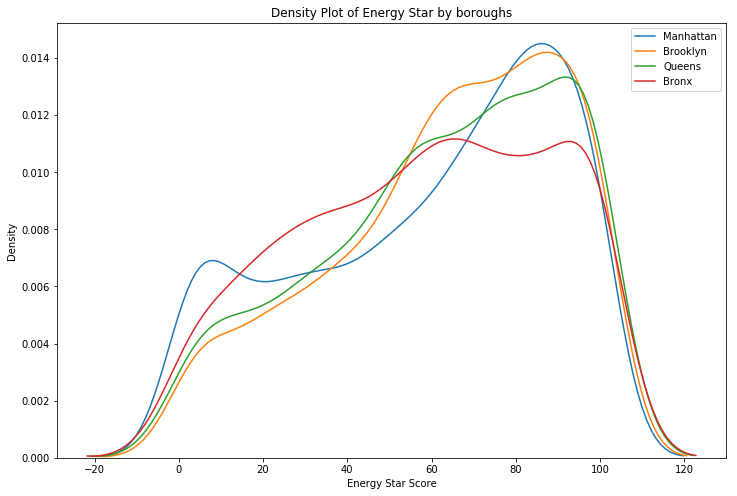

In [44]:
plt.figure(figsize=(12,8))

for borough in boroughs:
    subset = arquivo[arquivo['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(), label = borough)
    
plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Density Plot of Energy Star by boroughs')

In [45]:
# investigar a correlação
correlations_data = arquivo.corr()['score'].sort_values()

print(correlations_data.head(15), '\n')
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.725326
Weather Normalized Site EUI (kBtu/ft²)                       -0.715471
Weather Normalized Source EUI (kBtu/ft²)                     -0.643974
Source EUI (kBtu/ft²)                                        -0.639500
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.354108
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.348750
Direct GHG Emissions (Metric Tons CO2e)                      -0.142917
Weather Normalized Site Natural Gas Use (therms)             -0.132440
Natural Gas Use (kBtu)                                       -0.130495
Year Built                                                   -0.121421
Total GHG Emissions (Metric Tons CO2e)                       -0.114735
Property Id                                                  -0.052091
Latitude                                                     -0.048747
Electricity Use - Grid Purchase (kBtu)                       -0.048387
Weathe

In [46]:
numeric_subset = arquivo.select_dtypes('number')

for col in numeric_subset:
    if col != 'score':
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_'  + col] = np.sqrt(numeric_subset[col])
        
categorical_subset = arquivo[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features = features.dropna(subset = ['score'])

correlations = features.corr()['score'].dropna().sort_values()

In [50]:
# correlações negativas:
correlations.head(12)

Site EUI (kBtu/ft²)                             -0.725326
Weather Normalized Site EUI (kBtu/ft²)          -0.715471
log_Site EUI (kBtu/ft²)                         -0.702573
sqrt_Site EUI (kBtu/ft²)                        -0.702573
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.691792
log_Weather Normalized Site EUI (kBtu/ft²)      -0.691792
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.670205
log_Weather Normalized Source EUI (kBtu/ft²)    -0.670205
log_Source EUI (kBtu/ft²)                       -0.668350
sqrt_Source EUI (kBtu/ft²)                      -0.668350
Weather Normalized Source EUI (kBtu/ft²)        -0.643974
Source EUI (kBtu/ft²)                           -0.639500
Name: score, dtype: float64

In [48]:
# correlações positivas:
correlations.tail()

log_Council District                0.056872
sqrt_Council District               0.056872
Council District                    0.057849
Largest Property Use Type_Office    0.168896
score                               1.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

<Figure size 864x576 with 0 Axes>

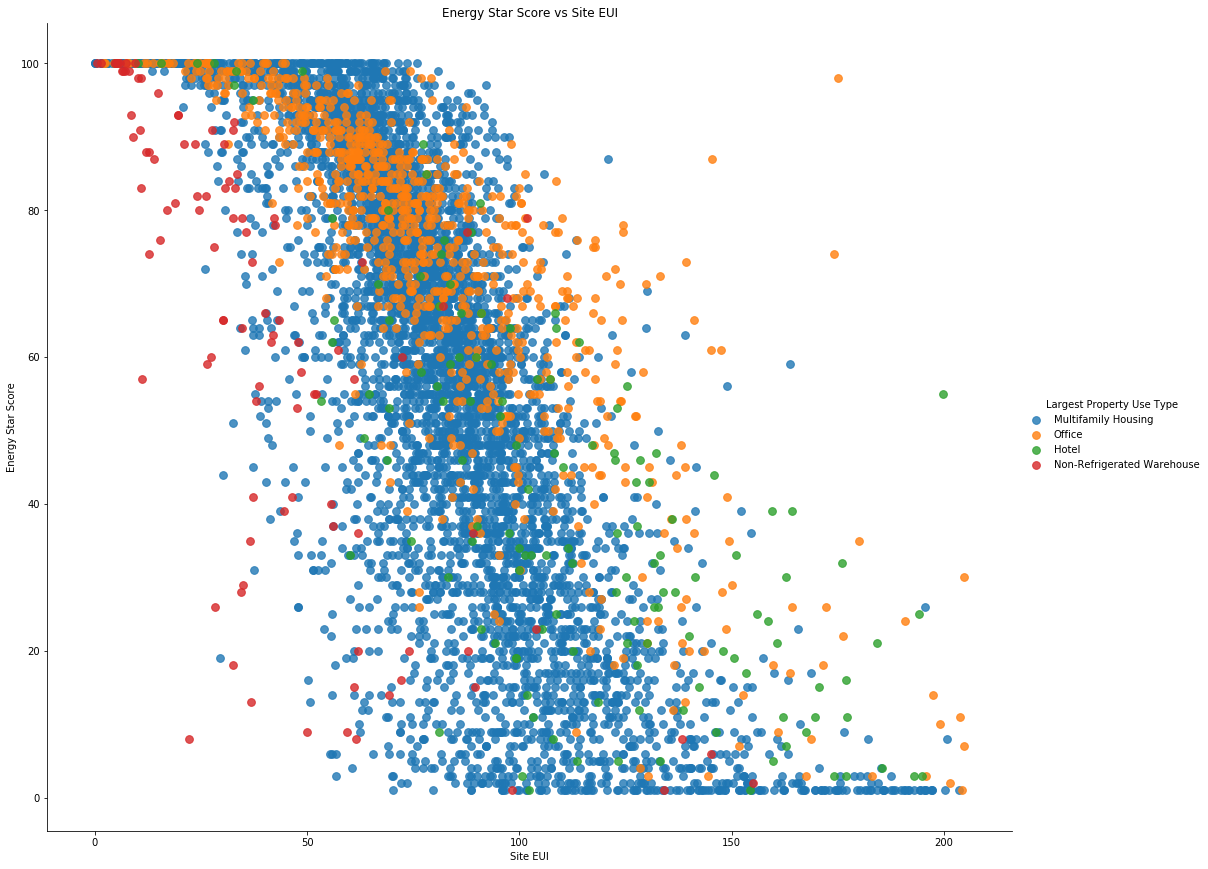

In [53]:
plt.figure(figsize=(12,8))

features['Largest Property Use Type'] = arquivo.dropna(subset = ['score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

plt.xlabel('Site EUI')
plt.ylabel('Energy Star Score')
plt.title('Energy Star Score vs Site EUI')

<b>7. Seleção de Variáveis</b>

In [55]:
features = arquivo.copy()

numeric_subset = features.select_dtypes('number')

for col in numeric_subset.columns:
    if col != 'score':
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = arquivo[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(6622, 81)

In [56]:
# remover variáveis colineares
def remove_collinear_features(x, threshold):

    y = x['score']
    x = x.drop(columns = ['score'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y
               
    return x

In [57]:
features = remove_collinear_features(features, 0.6)

In [58]:
features = features.dropna(axis = 1, how = 'all')
features.shape

(6622, 36)

<b>6. Treinando o modelo</b>

In [59]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 36)
(6622, 36)


In [60]:
features = score.drop(columns='score')
targets  = pd.DataFrame(score['score'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(4635, 35)
(1987, 35)
(4635, 1)
(1987, 1)


In [63]:
# salvar os dados para continuar depois
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

In [64]:
# reload data
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

Text(0.5, 1.0, 'ENERGY Star Score Distribution')

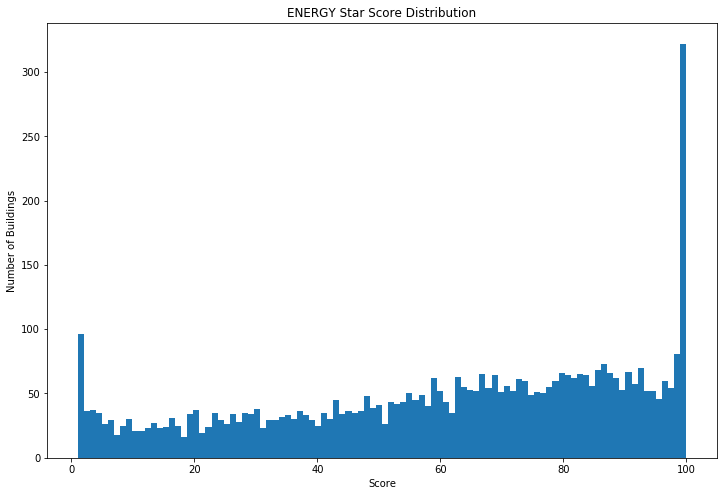

In [65]:
plt.figure(figsize=(12,8))

plt.hist(train_labels['score'].dropna(), bins = 100)
plt.xlabel('Score'); plt.ylabel('Number of Buildings')
plt.title('ENERGY Star Score Distribution')

In [66]:
# tratar valores missing
imputer = Imputer(strategy='median')

imputer.fit(train_features)

X      = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [68]:
# resultado
print('Valores Missing nos Dados de Treino: ', np.sum(np.isnan(X)))
print('Valores Missing nos Dados de Teste:  ', np.sum(np.isnan(X_test)))
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

Valores Missing nos Dados de Treino:  0
Valores Missing nos Dados de Teste:   0
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [69]:
# colocar os dados na mesma escala
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(X)

X      = scaler.transform(X)
X_test = scaler.transform(X_test)

In [71]:
y      = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [73]:
# função para modelagem preditiva
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    
    model.fit(X, y)
    
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [74]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Performance do Linear Regression nos dados de teste: MAE = %0.4f' % lr_mae)

Performance do Linear Regression nos dados de teste: MAE = 13.8809


In [75]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Performance do Support Vector Machine Regression nos dados de teste: MAE = %0.4f' % svm_mae)

Performance do Support Vector Machine Regression nos dados de teste: MAE = 11.3731


In [76]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Performance do Random Forest Regression nos dados de teste: MAE = %0.4f' % random_forest_mae)

Performance do Random Forest Regression nos dados de teste: MAE = 10.3059


In [77]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Performance doo Gradient Boosted Regression nos dados de teste: MAE = %0.4f' % gradient_boosted_mae)

Performance doo Gradient Boosted Regression nos dados de teste: MAE = 10.2579


In [78]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('Performance do K-Nearest Neighbors Regression nos dados de teste: MAE = %0.4f' % knn_mae)

Performance do K-Nearest Neighbors Regression nos dados de teste: MAE = 14.2441


In [79]:
# Otimizar o modelo:
loss = ['ls', 'lad', 'huber']

n_estimators = [100, 500, 900, 1100, 1500]

max_depth = [2, 3, 5, 10, 15]

min_samples_leaf = [1, 2, 4, 6, 8]

min_samples_split = [2, 4, 6, 10]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [80]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [81]:
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min


KeyboardInterrupt: 

In [ ]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(10)

In [ ]:
random_cv.best_estimator_

In [ ]:
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
grid_search.fit(X, y)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Erro em Teste')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Erro em Treino')
plt.xlabel('Número de Árvores'); plt.ylabel('Mean Abosolute Error'); plt.legend()
plt.title('Performance vs Número de Árvores')

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

In [ ]:
default_model = GradientBoostingRegressor(random_state = 42)

final_model = grid_search.best_estimator_

final_model

In [ ]:
default_model.fit(X, y)

In [ ]:
final_model.fit(X, y)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Performance do Modelo Padrão nos dados de teste: MAE = %0.4f.' % mae(y_test, default_pred))
print('Performance do Modelo Final nos dados de teste:   MAE = %0.4f.' % mae(y_test, final_pred))

In [ ]:
plt.figure(figsize=(12,8))

sns.kdeplot(final_pred, label = 'Previsões')
sns.kdeplot(y_test, label = 'Valores')

plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Valores de Teste e Previsões');

In [ ]:
plt.figure(figsize=(12,8))

residuals = final_pred - y_test

plt.hist(residuals, color = 'red', bins = 20,edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribuição de Residuais');

In [ ]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [ ]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

### Previsões

In [ ]:
model_pred = model.predict(X_test)

print('Performance do Modelo Final nos dados de teste: MAE = %0.4f' % mae(y_test, model_pred))